# Natasha/Yargy

## базовый синтаксис

In [1]:
!pip install yargy

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/OpenSSL/crypto.py:12: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography import x509
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/87/c6/3508072bae4303ba75ee2f14a8640fe09f0cc41dc19c579b17d465d4e4f5/yargy-0.15.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/0a/39/27bf729ea7c9d0d9dadba9ae46d521f7c5a75aa2a867dd0b63c35ec3f0b4/pymorphy2-0.9.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/

In [2]:
from yargy import rule, Parser, or_, and_
from yargy.predicates import gte, lte, caseless, normalized, dictionary, gram, is_capitalized

In [3]:
# числа в определённых границах
DAY = and_(
    gte(1),
    lte(31)
)
MONTH = and_(
    gte(1),
    lte(12)
)
YEAR = and_(
    gte(1),
    lte(2018)
)
# множество месяцев
MONTHS = {
    'январь',
    'февраль',
    'март',
    'апрель',
    'мая',
    'июнь',
    'июль',
    'август',
    'сентябрь',
    'октябрь',
    'ноябрь',
    'декабрь'
}
# словарь месяцев - специальный класс в yargy
MONTH_NAME = dictionary(MONTHS)
# логический оператор для описания строк `г.`, `Г.`, `года` и тд
YEAR_WORDS = or_(
    rule(caseless('г'), '.'),
    rule(normalized('год'))
)
# собираем всё в одно правило
DATE =  rule(
    DAY,
    MONTH_NAME,
    YEAR,
    YEAR_WORDS.optional()
)


In [4]:
parser = Parser(DATE)
text = '''
8 января 2014 года, 
15 июня 2001 г.,
31 февраля 2018
'''
# выведем только первое совпадение
for match in parser.findall(text):
    print(match)
    start, end = match.span
    print(text[start:end])
    break

Match(tokens=[Token(value='8', span=[1, 2), type='INT'), MorphToken(value='января', span=[3, 9), type='RU', forms=[Form('январь', Grams(NOUN,gent,inan,masc,sing))]), Token(value='2014', span=[10, 14), type='INT'), MorphToken(value='года', span=[15, 19), type='RU', forms=[Form('год', Grams(NOUN,gent,inan,masc,sing)), Form('год', Grams(Infr,NOUN,accs,inan,masc,plur)), Form('год', Grams(Infr,NOUN,inan,masc,nomn,plur))])], span=[1, 19))
8 января 2014 года


## Как использовать морфологическую информацию для описания нужных подстрок?

In [5]:
# источник: https://academia.interfax.ru/ru/news/articles/7492/

text2 = """
В Российской академии народного хозяйства и госслужбы (РАНХиГС) сообщили "Интерфаксу", что "в связи со сложной эпидемиологической ситуацией в столице и в соответствии с рекомендациями региональных властей руководством Академии было принято решение о продлении дистанционного формата обучения для студентов".
"Учебный процесс будет организован в дистанционном формате до дальнейшего распоряжения", - уточнили в Академии. Там добавили, что решение о формате обучения в филиалах вуза будет приниматься каждым регионом отдельно в зависимости от ситуации с COVID-19.
В Московском авиационном институте (МАИ) сообщили "Интерфаксу", что с 8 по 13 ноября реализация основных образовательных программ будет организована исключительно с применением дистанционных образовательных технологий.
Аналогичным образом занятия будут проходить в Московском государственном университете им. Баумана. Согласно приказу ректора вуза, в этот период "первый прием задолженностей проводится в дистанционном формате, а приём задолженностей на аттестационных комиссиях - в очном, текущие контрольные будут сдаваться с применением онлайн-технологий". Кроме того, ранее сообщалось, что "Бауманка" с 8 ноября вводит QR-коды для допуска на мероприятия вуза.
Такая же система "входного" контроля будет введена с 15 ноября для допуска на очные занятия студентов в Московском городском педагогическом университете (МГПУ). Для тех, кто не прошел вакцинацию от коронавируса и не имеет медицинского отвода, занятия будут проводиться только в дистанционном формате.
О переводе студентов на дистант после нерабочих дней сообщил ранее Национальный исследовательский университет "Высшая школа экономики".
"""

In [6]:
from pprint import pprint

In [7]:
pprint(text2)

('\n'
 'В Российской академии народного хозяйства и госслужбы (РАНХиГС) сообщили '
 '"Интерфаксу", что "в связи со сложной эпидемиологической ситуацией в столице '
 'и в соответствии с рекомендациями региональных властей руководством Академии '
 'было принято решение о продлении дистанционного формата обучения для '
 'студентов".\n'
 '"Учебный процесс будет организован в дистанционном формате до дальнейшего '
 'распоряжения", - уточнили в Академии. Там добавили, что решение о формате '
 'обучения в филиалах вуза будет приниматься каждым регионом отдельно в '
 'зависимости от ситуации с COVID-19.\n'
 'В Московском авиационном институте (МАИ) сообщили "Интерфаксу", что с 8 по '
 '13 ноября реализация основных образовательных программ будет организована '
 'исключительно с применением дистанционных образовательных технологий.\n'
 'Аналогичным образом занятия будут проходить в Московском государственном '
 'университете им. Баумана. Согласно приказу ректора вуза, в этот период '
 '"первый 

In [8]:
TITLE = dictionary({
    'университет',
    'институт',
    'академия'
})
VUZ = rule(
    gram('ADJF'),  # теги pymorphy
    gram('ADJF'),
    TITLE
)

In [9]:
parser = Parser(VUZ)
for match in parser.findall(text2):
    start, end = match.span
    print(text2[start:end])

Московском авиационном институте
Московском государственном университете
городском педагогическом университете
Национальный исследовательский университет


Как улучшить наше правило, чтобы включать более длинные названия?

In [10]:
VUZ = rule(
    and_(gram('ADJF'), is_capitalized()),  # теги pymorphy: могут быть не только POS-теги
    gram('ADJF').optional().repeatable(),
    TITLE
)

In [11]:
# Напишем простенькую функцию для проверки правил
def print_rule_matches(r, t):
    parser = Parser(r)
    for match in parser.findall(t):
        start, end = match.span
        print(t[start:end])

In [12]:
print_rule_matches(VUZ, text2)

Российской академии
Московском авиационном институте
Московском государственном университете
Московском городском педагогическом университете
Национальный исследовательский университет


## Задание
Предложите правила для выделения последовательностей *Российской академии народного хозяйства и госслужбы*, *Высшая школа экономики*

Какие ещё улучшения можно сделать для этого текста?

In [13]:
# YOUR CODE

## Предикаты

Предикаты `gram`, `is_capitalized` и т.д. принимают на вход токен, проверяют его на совпадение с каким-либо условием, возвращают `True`/`False`.

Можно создать свой предикат с помощью `yargy.predicates.custom` и затем использовать его в правилах:

In [14]:
from yargy.predicates import custom

from yargy.parser import Context
from yargy.tokenizer import Tokenizer
import re

abbr_pattern = re.compile('^[А-Я][А-Я]+$')

def is_abbreviation_func(token):
    return abbr_pattern.match(token)

is_abbreviation = custom(is_abbreviation_func)

In [15]:
ABBR = rule(
    VUZ,
    '(',
    is_abbreviation,
    ')'
)

In [16]:
print_rule_matches(ABBR, text2)

Московском авиационном институте (МАИ)
Московском городском педагогическом университете (МГПУ)


## Интерпретация результатов разбора

Наши правила - это КС-грамматика. Парсер возвращает дерево разбора подстрок, соответствующих данной грамматике. Узлы дерева можно соотносить с полями шаблона, например, выделять в упоминании человека [фамилию], [имя], [отчество].

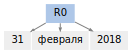

In [17]:
from IPython.display import display
parser = Parser(DATE)
for line in text.split('\n'):
    match = parser.match(line)
    if match is not None:
        display(match.tree.as_dot)
        break

Для этого на соответствующие нетерминалы правил нужно навесить метод `.interpretation()`.

Интересно ли об этом поговорить?

## Согласование

Предыдущие правила выделяли последовательности токенов, не учитывая связь между ними. 

In [18]:
from yargy.relations import gnc_relation

gnc = gnc_relation()
NAME = rule(
    gram('Name').match(gnc),
    gram('Surn').match(gnc)
)

In [19]:
test = "Илье Ивановым, Павлом Семенов, Саша Быков"
print_rule_matches(NAME, test)

Саша Быков


## Другие типы сущностей

На самом деле, такими правилами можно описывать не только PER-LOC-ORG, но и многое другое:
- адреса (например, показывать карту в письме)
- структурированную информацию из резюме
- ингредиенты из рецептов  https://github.com/natasha/yargy-examples/blob/master/04_food/notes.ipynb
- и т.п.

Даже такое: https://github.com/natasha/yargy-examples/blob/master/03_fsem/notes.ipynb

## Встроенные грамматики в Natasha

Человечество долго решало проблему выделения стандартных NE, поэтому для них есть готовые правила (с интерпретацией и нормализацией).

Также в Natasha есть готовая модель для NER: CharCNN+Bi-LSTM+CRF - более компактная, чем SOTA-модели, но не сильно уступающая по качеству.

https://natasha.github.io/ner/

In [20]:
!pip install natasha

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/OpenSSL/crypto.py:12: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography import x509
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 34.4MB 459kB/s  eta 0:00:01
     |████████████████████████████████| 79.7MB 35.7MB/s eta 0:00:01
     |████████████████████████████████| 33.9MB 35.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/6a/84/ff1ce2071d4c650ec85745766c0047ccc3b5036f1d03559fd46bb38b5eeb/DAWG_Python-0.7.

In [21]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,
    AddrExtractor,

    Doc
)

In [22]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [23]:
# функция для применения всех этапов анализа к тексту
def natasha_pipeline(t):
    doc = Doc(t)

    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)
    for span in doc.spans:
        span.normalize(morph_vocab)
        if span.type == 'PER':
            span.extract_fact(names_extractor)
            print(str(span.fact), span.normal)

In [24]:
text4 = """
Иванов не согласился по вопросу о РОП с главой Российского союза промышленников и предпринимателей Александром Шохиным, который заявил о «большой озабоченности» бизнеса из-за концепции РОП. 
«Пока нам не удается убедить Минприроды в нецелесообразности введения с 2022 года 100% норматива утилизации упаковки.
"""

In [25]:
natasha_pipeline(test)

DocFact(slots=[...]) Илья Иванов
DocFact(slots=[...]) Павел Семенов
DocFact(slots=[...]) Саша Быков


In [26]:
natasha_pipeline(text4)

DocFact(slots=[...]) Иванов
DocFact(slots=[...]) Александр Шохин


# Другие библиотеки для русского языка

## stanza

In [27]:
!pip install stanza

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/OpenSSL/crypto.py:12: CryptographyDeprecationWarning: Python 2 is no longer supported by the Python core team. Support for it is now deprecated in cryptography, and will be removed in the next release.
  from cryptography import x509
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 81kB 1.2MB/s eta 0:00:01
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/Library/Python/2.7/site-packages/test'
Consider using the `--user` option or check the permissions.



In [28]:
import stanza
stanza.download('ru')

2021-11-10 20:52:07 INFO: Downloading default packages for language: ru (Russian)...
2021-11-10 20:52:09 INFO: File exists: /Users/rhubarb/stanza_resources/ru/default.zip.
2021-11-10 20:52:14 INFO: Finished downloading models and saved to /Users/rhubarb/stanza_resources.


In [29]:
nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')
doc = nlp(text2)
for sent in doc.sentences:
    for ent in sent.ents:  # достаем NE
        print(ent)

2021-11-10 20:52:14 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| ner       | wikiner   |

2021-11-10 20:52:14 INFO: Use device: cpu
2021-11-10 20:52:14 INFO: Loading: tokenize
2021-11-10 20:52:14 INFO: Loading: ner
2021-11-10 20:52:15 INFO: Done loading processors!


{
  "text": "Российской академии народного хозяйства и госслужбы",
  "type": "ORG",
  "start_char": 3,
  "end_char": 54
}
{
  "text": "РАНХиГС",
  "type": "ORG",
  "start_char": 56,
  "end_char": 63
}
{
  "text": "Интерфаксу",
  "type": "ORG",
  "start_char": 75,
  "end_char": 85
}
{
  "text": "Академии",
  "type": "ORG",
  "start_char": 219,
  "end_char": 227
}
{
  "text": "Академии",
  "type": "ORG",
  "start_char": 411,
  "end_char": 419
}
{
  "text": "COVID",
  "type": "MISC",
  "start_char": 553,
  "end_char": 558
}
{
  "text": "Московском авиационном институте",
  "type": "LOC",
  "start_char": 565,
  "end_char": 597
}
{
  "text": "МАИ",
  "type": "LOC",
  "start_char": 599,
  "end_char": 602
}
{
  "text": "Интерфаксу",
  "type": "ORG",
  "start_char": 614,
  "end_char": 624
}
{
  "text": "Московском государственном университете им. Баумана",
  "type": "LOC",
  "start_char": 828,
  "end_char": 879
}
{
  "text": "Бауманка",
  "type": "ORG",
  "start_char": 1158,
  "end_char": 1166

## ?
Как нормализовать упоминания сущностей?

А свести все упоминания одной сущности к стандартному виду? Для этого обычно нужна внешняя база знаний (например, Wikidata)

## DeepPavlov

Есть модуль для **NER**, несколько моделей. По архитектуре:
* RNN
* BERT-based
* Bi-LSTM-CNN-CRF http://www.ijmlc.org/vol9/758-ML0025.pdf

По обучающим данным:
* Collection3 (ru)
* OntoNotes (en) -- более интересная разметка, см. ниже
* CoNLL-2003

Есть модуль для **Entity Linking**.

Entity Linking component performs the following steps:

* the substring, detected with NER (English) or NER (Russian), is fed to TfidfVectorizer and the resulting sparse vector is converted to dense one

* Faiss library is used to find k nearest neighbours for tf-idf vector in the matrix where rows correspond to tf-idf vectors of words in entity titles

* entities are ranked by number of relations in Wikidata (number of outgoing edges of nodes in the knowledge graph)

* BERT (English) or BERT (Russian) is used for entities ranking by entity description and by sentence that mentions the entity

In [34]:
!pip3 install deeppavlov

  Using cached deeppavlov-0.17.1-py3-none-any.whl (929 kB)
  Using cached pymorphy2-0.8-py2.py3-none-any.whl (46 kB)
  Using cached scipy-1.4.1.tar.gz (24.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached Cython-0.29.14-cp39-cp39-macosx_10_15_x86_64.whl
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached sacremoses-0.0.35-py3-none-any.whl
  Using cached nltk-3.4.5-py3-none-any.whl
  Using cached scikit-learn-0.21.2.tar.gz (12.2 MB)
  Using cached pydantic-1.3-py36.py37.py38-none-any.whl (85 kB)
  Using cached pyOpenSSL-19.1.0-py2.py3-none-any.whl (53 kB)
  Using cached pyTelegramBotAPI-3.6.7-py3-none-any.whl
  Using cached rusenttokenize-0.0.5-py3-none-any.whl (10 kB)
  Using cached fastapi-0.47.1-py3-none-any.whl (43 kB)
  Using cached ruamel.yaml-0.15.100-cp39-cp39-macosx_10_15_x86_64.whl
  Using cached prometheus_client-0.7.1-py3-none-any.whl
  Using cached h5py-2.10.0

anceled
ERROR: Operation cancelled by user
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [35]:
from deeppavlov import configs, build_model
ner_model = build_model(configs.ner.ner_ontonotes_bert_mult_torch, download=True)

ModuleNotFoundError: No module named 'deeppavlov'

In [ ]:
ner_model([text4.split('\n')[1]])

In [ ]:
text5 = """
Режим Виши или Вишистская Франция (официальное название Францу́зское Госуда́рство (фр. l'État français)) — коллаборационистский режим в Южной Франции, появившийся после поражения Франции в начале Второй мировой войны и падения Парижа в 1940 году. 
Одновременно Северная Франция и атлантическое побережье были оккупированы нацистской Германией с согласия Вишистского правительства. 
Режим существовал с 10 июля 1940 по 22 апреля 1945 (де-факто до 25 августа 1944). 
Официально придерживался политики нейтралитета, но фактически проводил политику в интересах стран «оси».
"""

In [ ]:
pprint(text5)
text5

In [ ]:
sentences = ner_model([line for line in text5.splitlines() if line])
list(zip(sentences[0][0], sentences[1][0]))

In [ ]:
el_model = build_model(configs.kbqa.entity_linking_rus, download=True)
el_model(['Москва — столица России, город федерального значения, административный центр Центрального федерального округа и центр Московской области.'])